<a href="https://colab.research.google.com/github/MEugeniaLuna/EncuestaSueldosSysarmy/blob/main/EDAEncuestaSueldosSysarmy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿Que es "EDA"?**

En sus siglas en inglés hace referencia al Análisis Exploratorio de Datos. Este es el primer paso que debemos realizar como Data Scientists y consta de una primera revisión del estado de los datos y los consecuentes pasos necesarios para una correcta transformación.

La ciencia de datos es una disciplina que te permite convertir datos crudos en entendimiento, comprensión y conocimiento.

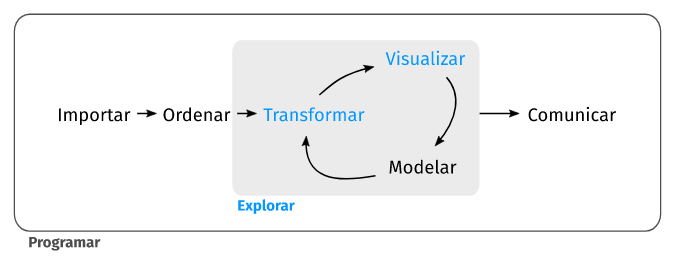

En este sentido, el primer objetivo radica en preguntarnos ¿De qué se trata este dataset?




## Explorando algunos datos
Vamos a trabajar con un set de datos obtenido de **SysArmy** que se denomina **"Encuesta de Sueldos"** y se puede consultar en: [este sitio](https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-sueldos-2021-1/).

<center>
<img src="https://i.imgur.com/ivxTHhG.png" height="150" />
</center>

Sysarmy es una organización internacional perteneciente a la comunidad de sistemas que nuclea a profesionales del área para favorecer el contacto y el intercambio de conocimiento de manera informal. Anualmente desarrollan una encuesta de sueldos con el objetivo de obtener información sobre la situación laboral actual en tecnología, evaluan el máximo nivel educativo alcanzado de los encuestados y brindan información sobre diferentes empresas. 


In [ ]:
import pandas as pd
import numpy as np
#importo las librerías de pandas (para datos tabulados) y numpy (para datos numéricos) para explorar y graficar el dataset


In [ ]:
url = 'https://raw.githubusercontent.com/yaninaiberra/metcampDataScience2021/main/Encuentro2/Dataset/sysarmy_2020_renamed.csv'
#en la variable url cargo el dataset publicado en esa página web
df = pd.read_csv(url,error_bad_lines=False)

 #df es la variable donde guardo el dataframe y utilizo read_csv para leer archivos separados por ,

In [ ]:
#vamos a explorar las primeras 5 filas
df.head(5)

,Unnamed: 0,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.0,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría

In [ ]:
#Para conocer las dimensiones de nuestro dataset, el tamaño en cuanto a cantidad de filas y columnas
print('Cantidad de Filas y columnas:', df.shape)


Cantidad de Filas y columnas: (6095, 49)


In [ ]:
#Para explorar los nombres de las columnas
print('Nombre columnas:', df.columns)

Nombre columnas: Index(['Unnamed: 0', 'perfil_genero', 'perfil_edad', 'trabajo_pais',
       'trabajo_provincia', 'perfil_anos_experiencia',
       'trabajo_anios_empresa_actual', 'trabajo_anios_puesto_actual',
       'trabajo_personas_a_cargo', 'perfil_nivel_estudios',
       'perfil_estado_estudios', 'perfil_carrera', 'perfil_universidad',
       'perfil_cursos_especializacion', 'perfil_contribuciones_open_source',
       'perfil_programa_como_hobbie', 'trabajo_rol', 'herramientas_plataforma',
       'herramientas_languagjs_programacion', 'herramientas_frameworks',
       'herramientas_data_bases', 'herramientas_qa_testing',
       'herramientas_IDEs', 'herramientas_sistema_operativo_pc',
       'herramientas_sistema_operativo_cel', 'trabajo_guardias ',
       'salario_guardias_pago', 'trabajo_guardias_tipo_pago ',
       'trabajo_tipo_contrato', 'salario_mensual_BRUTO',
       'salario_mensual_NETO', 'salario_salario_dolares',
       'salario_conformidad_sueldo',
       'salario_com

In [ ]:
#vemos cada columna y la cantidad de datos y el tipo de columnas: cual es un objeto, cual un int64 (numero entero) y cual float numeros con decimales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 49 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     6095 non-null   int64  
 1   perfil_genero                                  6095 non-null   object 
 2   perfil_edad                                    6095 non-null   int64  
 3   trabajo_pais                                   6095 non-null   object 
 4   trabajo_provincia                              6095 non-null   object 
 5   perfil_anos_experiencia                        6095 non-null   float64
 6   trabajo_anios_empresa_actual                   6095 non-null   float64
 7   trabajo_anios_puesto_actual                    6095 non-null   float64
 8   trabajo_personas_a_cargo                       6095 non-null   int64  
 9   perfil_nivel_estudios                          6095 

¿Cuántos **varones**, **mujeres** y **otros** respondieron la encuesta? Lo vemos usando `value_counts()` 

¿De que tipo de variable se trata?




In [ ]:
df['perfil_genero'].value_counts()

Hombre    5122
Mujer      942
Otros       31
Name: perfil_genero, dtype: int64

¿Cuál son los niveles de estudios alcanzados?


In [ ]:
df['perfil_nivel_estudios'].value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: perfil_nivel_estudios, dtype: int64

¿Te animás a calcular cuántas personas encuestadas tienen **estudios completos**, en **curso** o **incompletos**?

¿Te parece que el tipo de variable es diferente a la anterior?



In [ ]:
df['perfil_estado_estudios'].value_counts()

Completado    2907
En curso      1684
Incompleto    1504
Name: perfil_estado_estudios, dtype: int64

Comencemos a explorar algunos datos estadísticos. Por ejemplo, qué podemos observar sobre el **Sueldo Bruto**?


In [ ]:
df.describe()

,Unnamed: 0,perfil_edad,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,salario_guardias_pago,salario_mensual_BRUTO,salario_mensual_NETO,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion
count,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6.095000e+03,5.883000e+03,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000
mean,3047.000000,41.181952,8.930861,3.311944,2.889770,2.211649,664.042084,1.240585e+05,9.490795e+04,2.619524,2.363577,10.444511,2.785562,7.340115,7.621001
std,1759.619277,665.721175,7.161094,4.367742,3.423228,32.983395,10540.523461,1.229124e+05,9.686226e+04,0.858621,0.945713,12.860433,2.837195,2.024057,2.324034
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1523.500000,27.000000,3.000000,0.000000,1.000000,0.000000,0.000000,6.159500e+04,5.148000e+04,2.000000,2.000000,0.000000,0.000000,6.000000,6.000000
50%,3047.000000,31.000000,7.000000,2.000000,2.000000,0.000000,0.000000,9.600000e+04,7.800000e+04,3.000000,2.000000,7.000000,2.000000,8.000000,8.000000
75%,4570.500000,37.000000,13.000000,4.000000,4.000000,0.000000,0.000000,1.450000e+05,1.060000e+05,3.000000,3.000000,18.000000,6.000000,9.000000,10.000000
max,6094.000000,52000.000000,115.000000,43.000000,34.000000,2500.000000,650000.000000,2.180000e+06,2.080000e+06,4.000000,4.000000,100.000000,8.000000,10.000000,10.000000


In [ ]:
#Calculemos el sueldo neto promedio
df['salario_mensual_NETO'].mean()

94907.9491018188

In [ ]:
#Calculemos la mediana del sueldo neto
df['salario_mensual_NETO'].median()

78000.0

In [ ]:
#Calculemos la edad promedio de las personas que contestaron la encuesta
df['perfil_edad'].mean()

41.18195242001641

# **Análisis de salarios**


Una de las variables más interesantes del dataset es el Salario Neto de las personas encuestadas. A su vez, contamos con la variable Género que podría aportarnos información sobre la existencia de brechas de ingresos entre mujeres, varones y diversidades.

Planteamos una primer hipótesis: a mayor nivel de estudio, mejor sueldo tienen las personas encuestadas. Para calcularlo, vamos a quedarnos solamente con las columnas que nos interesan: género, nivel de estudios y salario neto.

In [ ]:
#Guardamos un nuevo dataframe solo con las variables que nos interesan para este análisis
df_renamed= df[["perfil_genero", "perfil_nivel_estudios", "salario_mensual_NETO"]] 

In [ ]:
print(df_renamed)

     perfil_genero perfil_nivel_estudios  salario_mensual_NETO
0            Mujer         Universitario             43000.000
1           Hombre         Universitario             63000.000
2            Mujer            Secundario            127000.000
3           Hombre              Posgrado            102000.000
4           Hombre         Universitario            106000.000
...            ...                   ...                   ...
6090        Hombre             Terciario             97000.000
6091        Hombre         Universitario             71000.000
6092        Hombre             Terciario                45.753
6093        Hombre             Terciario                72.000
6094        Hombre             Terciario             65000.000

[6095 rows x 3 columns]


Vamos a calcular el sueldo promedio según el nivel de estudio. Para eso, agrupamos por categorías:


In [ ]:
df_renamed.groupby(by='perfil_nivel_estudios').mean()

,salario_mensual_NETO
perfil_nivel_estudios,
Doctorado,91629.115517
Posdoctorado,529875.000000
Posgrado,124166.795300
Primario,87500.000000
Secundario,82686.351857
Terciario,80814.433784
Universitario,97410.224414


Según estos resultados, nuestra hipótesis no es válida, no es directamente proporcional el nivel de estudios con el salario neto pero hay una intuición que de universitario en adelante se cobra más que preuniversitario.

Podemos plantear otra hipótesis, como por ejemplo que los hombres perciben un mayor salario que las mujeres


In [ ]:
df_2= df[["perfil_genero", "perfil_nivel_estudios", "salario_mensual_NETO"]] 

In [ ]:
df_2.groupby(by="perfil_genero").mean().sort_index()

,salario_mensual_NETO
perfil_genero,
Hombre,98836.063558
Mujer,73501.414465
Otros,95441.354839


In [ ]:
df_2.groupby(["perfil_genero","perfil_nivel_estudios"]).mean()

salario_mensual_NETO
perfil_genero perfil_nivel_estudios                      
Hombre        Doctorado                     106188.055556
              Posdoctorado                  529875.000000
              Posgrado                      135623.966805
              Primario                       87500.000000
              Secundario                     83178.392924
              Terciario                      83319.810122
              Universitario                 101948.398608
Mujer         Doctorado                      55098.668750
              Posgrado                       87982.641467
              Secundario                     72746.416667
              Terciario                      66264.019419
              Universitario                  73812.631368
Otros         Doctorado                     101690.000000
              Posgrado                       76800.000000
              Secundario                    120000.000000
              Terciario                      65134.285714
              Universitario                 105309.052632

Veamos ahora cuál es la provincia con el sueldo más alto

In [ ]:
df_3 = df[["perfil_genero", "trabajo_provincia", "salario_mensual_NETO"]]

In [ ]:
df_3.groupby(by="trabajo_provincia").mean().sort_values(by="salario_mensual_NETO", ascending=False)

,salario_mensual_NETO
trabajo_provincia,
San Luis,108680.247143
La Pampa,107140.777778
Entre Ríos,103233.657625
Provincia de Buenos Aires,100351.680682
Córdoba,97886.075604
Ciudad Autónoma de Buenos Aires,96505.312605
Santa Fe,91410.332411
GBA,89872.867204
Mendoza,89722.011359


In [ ]:
df_3.groupby(by="trabajo_provincia").max().sort_values(by="salario_mensual_NETO")

,perfil_genero,salario_mensual_NETO
trabajo_provincia,,
Santa Cruz,Mujer,61400.0
Catamarca,Hombre,63400.0
Formosa,Hombre,72000.0
Salta,Hombre,92950.0
La Rioja,Mujer,97000.0
Misiones,Mujer,110000.0
San Juan,Mujer,115000.0
Tierra del Fuego,Mujer,122000.0
Chaco,Otros,135000.0


Comenzaremos a graficar algunos datos para poder visualizar algunas indicadores de una manera más clara y atractiva

Importamos las librerías que vamos a necesitar a lo largo del proyecto y las renombramos para que sea fácil recurrir a ellas cuando las precisemos. 

In [ ]:
import matplotlib #para visualizacio y graficos
import matplotlib.pyplot as plt
import seaborn as sns #Con pocos datos puedo obtener gráficos

sns.set(rc={'figure.figsize':(10,6)})   #esta linea de codigo es para determinar  un tamaño fijo para los graficos

# **Gráficos simples**

En esta notebook recorremos distintos tipos básicos de grafícos que pueden utilizarse en el análisis de datos, con aplicaciones prácticas. Nos centraremos no sólo el código para generarlos, sino también en algunos pequeños trucos para lograr gráficos más legibles.

Es importante recordar que, a pesar de que esta notebook utiliza los datos para ejemplificar los gráficos, en la aplicación real de la ciencia de datos ocurre lo contrario. Debemos pensar primero en la pregunta a responder, y luego diseñar la visualización. Esto incluye:

Encontrar el gráfico adecuado para los datos
Agrupar los datos de manera que resalten el patrón que ayuda a responder la pregunta inicial.
Encontrar los encodings visuales más efectivos para comunicar este patrón (aunque no vamos a hablar tanto de eso en esta notebook).
Recomendación: leer más sobre gráficos [aquí](https://www.data-to-viz.com/).

In [ ]:
df_5= df[["perfil_nivel_estudios", "salario_mensual_NETO"]].groupby('perfil_nivel_estudios').mean()
print(df_5)

                       salario_mensual_NETO
perfil_nivel_estudios                      
Doctorado                      91629.115517
Posdoctorado                  529875.000000
Posgrado                      124166.795300
Primario                       87500.000000
Secundario                     82686.351857
Terciario                      80814.433784
Universitario                  97410.224414


# **Gráficos de barras/columnas**

¿Si quisiera saber cuántas respuestas hay en el set de datos por nivel de estudio, qué tipo de gráficos puedo utilizar, teniendo en cuenta que una variable es categórica (nivel de estudio) y la otra numérica (cantidad de respuestas)?

Eje x: variable categórica

Eje y: variable numérica (Se puede hacer "acostado" también invirtiendo el orden)

Comparan cantidades numéricas entre variables categóricas. Son uno de los encodings más fieles y fáciles de percibir, es decir, que podemos leer las cantidades represetadas con más exactitud que en otros tipos de gráficos.

In [ ]:
df['perfil_nivel_estudios'].value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: perfil_nivel_estudios, dtype: int64

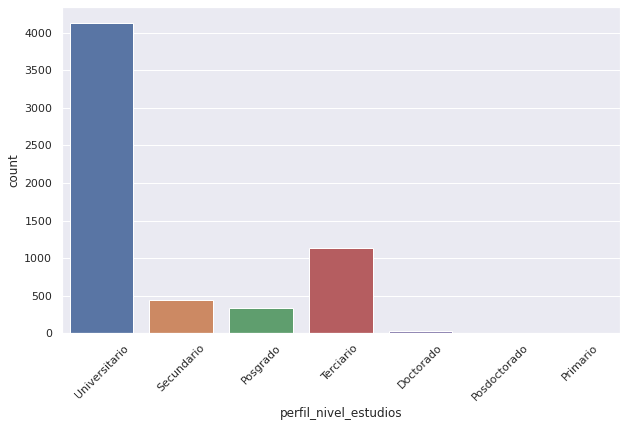

In [ ]:
sns.countplot(data=df,x='perfil_nivel_estudios')
plt.xticks(rotation=45); #para mover las etiquetas de las categorias del eje x para que se lean. El ; para que no nos muestre arriba los arrays

¿Y si quiero ver el promedio de salarios por nivel de estudio?

Son gráficos muy versátiles, pero no siempre son adecuados. Mientras más barras se grafican, menos atención se pone en la variación entre una barra y otra, y más evidente es la distribución total. Los gráficos de barra también son muy sensibles al ordenamiento, ya que mientras más alejadas están las barras más difícil es compararlas. Por otra parte, la diferencia en el tamaño de cada barra puede codificar sólo cierta cantidad de información. Por ejemplo, si las barras son grandes en alto, una pequeña diferencia entre ellas pasará desapercibida, mientras que si las barras son pequeñas, la misma diferencia será más evidente.

Los gráficos de barra son lo más adecuados para ver las variables categóricas, por ejemplo, el nivel de estudios, y alguna función de agregación sobre las categorías como la media de la v.a. *media del salario neto*. Para eso, podemos muy fácilmente pasarle a `seaborn` una función para calcular sobre la columna de salario usando el parámetro `estimator`.

Nota: El valor del `estimator` es por defecto la media, pero ahora lo hacemos explícito. Podríamos haber seleccionado otra función, como `numpy.median`, o haber definido una nueva.

Text(0.5, 0, 'Nivel de estudio')

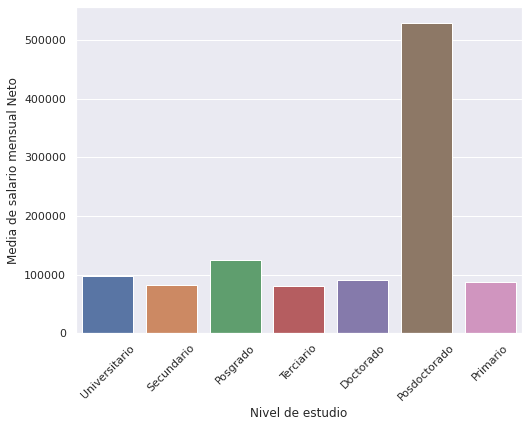

In [ ]:
#Salarios promedios por nivel de estudio
fig = plt.figure(figsize=(8,6))
sns.barplot(data=df,
            y= "salario_mensual_NETO", x="perfil_nivel_estudios",
            estimator=np.mean, ci=None)
plt.xticks(rotation=45);
plt.ylabel ("Media de salario mensual Neto")
plt.xlabel ("Nivel de estudio")

En este gráfico estamos usando la altura de las barras para representar el promedio de las estimaciones de salario para cada uno de los grupos. Sin embargo, esto no es evidente a primera vista. El usuario no tiene suficiente información para inferir el significado del eje vertical. Hay que tener en cuenta que muchas veces, el nombre original de la columna no representa la información agregada.

Este estadísico suele ser difícil de interpretar para quienes no son expertos en estadística.

Por último, algunas de las categorías tienen muy pocos valores para ser útiles por lo cual suele ser conveniente reagrupar y obtener un gráfico más representativo.  Por ej: posgrado, doctorado y posdoctorado, se pueden agrupar como "mas que universitario".


### Agrupaciones

Cuando queremos comparar distintos grupos, podemos usar el parámetro `hue`. Esto equivale a sumar otra v.a. al gráfico, que debe ser categórica.

Por ejemplo la variable `'perfil_estado_estudios'`.

In [ ]:
df["perfil_estado_estudios"].unique()  #muestra los valores posibles que puede tomar esta variable

array(['En curso', 'Completado', 'Incompleto'], dtype=object)

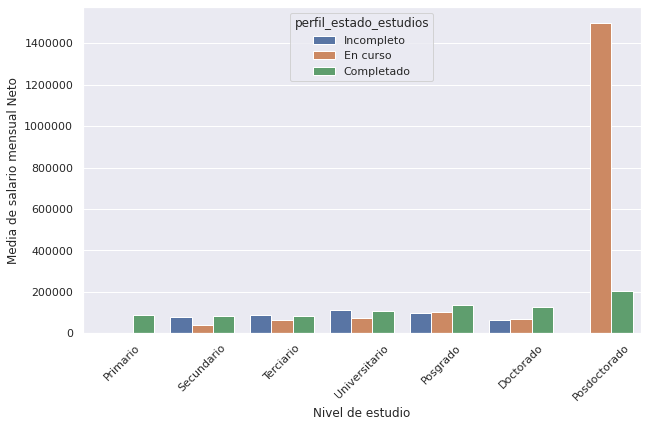

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
orden = ['Primario', 'Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado'] #determinamos el orden en que queremos que se muestren las barras
hue_orden = ['Incompleto', 'En curso', 'Completado'] #orden de la variable que qieremos aplicarle el hue
sns.barplot(y=df['salario_mensual_NETO'], x=df['perfil_nivel_estudios'],
            estimator=np.mean, ci=None,
            hue=df['perfil_estado_estudios'],
            order=orden, hue_order=hue_orden)
plt.xticks(rotation=45)
plt.ylabel ("Media de salario mensual Neto")
plt.xlabel ("Nivel de estudio")
plt.ticklabel_format(style='plain', axis='y')

el grafico muestra entonces el promedio del salario mensual neto, dado el nivel de estudios alcanzado en funcion del estado de esos estudios

## Gráficos de línea

Es útil por ejemplo si se quiere graficar el salario neto en relación a la edad. 

* Eje y: variable numérica
* Eje x: variable numérica continua

Es efectivo para comparar *cantidades numéricas*. Si lo comparamos con un gráfico de barras, tienen ventajas y desventajas. En primer lugar, sugiere una relación más fuerte entre los datos del eje horizontal, que deben ser secuenciales. Además de ello, pueden representar más valores ya que el peso visual de cada punto es mucho menor que una barra.

Por otra parte, un gráfico de líneas con pocos puntos puede ser indicativo de una tendencia que no existe (o que no tenemos suficientes datos como para mostrarla).

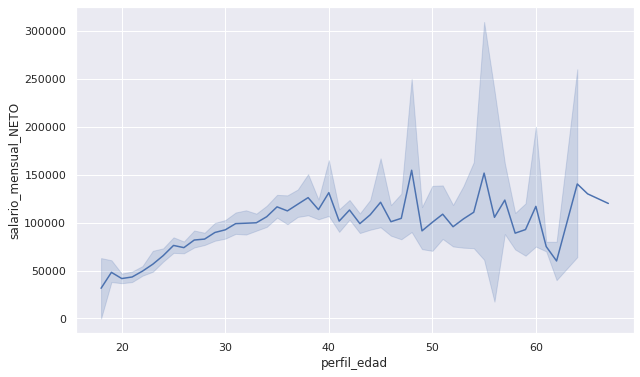

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data=df[df['perfil_edad']< 100], x='perfil_edad', y='salario_mensual_NETO');


### Filtrando los valores de una columna del dataframe

Existen dos formas de filtrar los valores de una columna numérica del Dataframe:

```
df[df['perfil_edad'] < 100]
```
o
```
df.query('perfil_edad < 100')


```

In [ ]:
df[df['perfil_edad'] < 100] 
# Sólo se visualizan los datos donde la edad es menor a 100.
# No se ha modificado el dataset completo "df"
#Siempre controlar con cuantos valores me quedo de los originales, una vez aplicado el filtro

,Unnamed: 0,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.000,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.000,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.000,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.000,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.000,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / C

In [ ]:
df.query('perfil_edad < 100')

,Unnamed: 0,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.000,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.000,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.000,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.000,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.000,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / C

## Gráficos de frecuencias (histogramas)

Es útil en casos donde queremos ver cómo se distribuyen nuestros datos en una variable numérica continua, cuántas ocurrencias hay por rango de valores (ya que al ser continua, si no se toman rangos, graficar una barra por cada valor sería ilegible y/ costoso computacionalmente).

* Eje x: variable numérica continua
* Eje y: conteo de ocurrencias de valores en cada intervalo

El gráfico generado es un histograma de frecuencias. En el eje x se grafican los valores que toma la columna, divididos en intervalos o bins. En el eje y se grafica el conteo de ocurrencias de valores en cada intervalo.

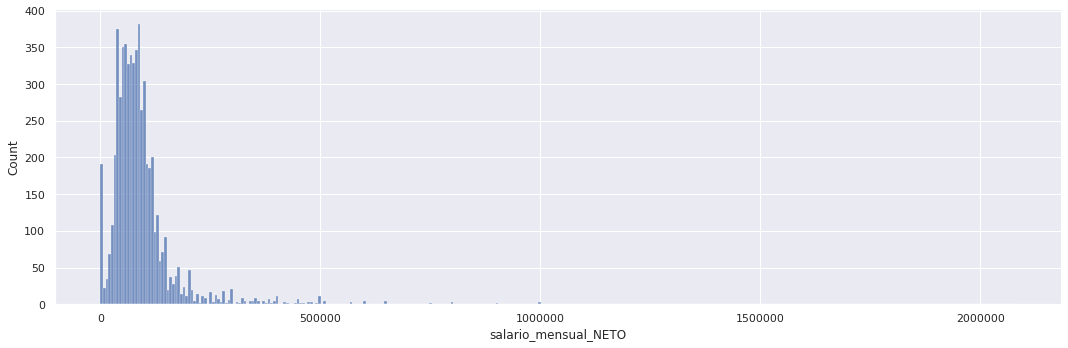

In [ ]:
sns.displot(df['salario_mensual_NETO'], aspect=3)
plt.ticklabel_format(style='plain', axis='x') #Para evitar la notación científica en las etiquetas

**¿Qué está pasando con ésta visualización?**

**¡Tip! **Antes de graficar, controlar el rango (ya que seaborn intentará crear miles de segmentos si el rango es muy grande) y remover los valores nulos.

In [ ]:
print("Rango: ", df['salario_mensual_NETO'].min(), df['salario_mensual_NETO'].max())

Rango:  1.0 2080000.0


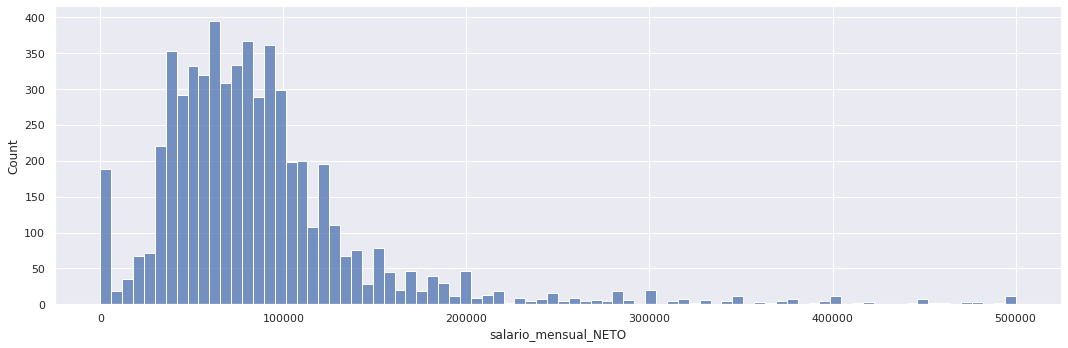

In [ ]:
# Volvemos a graficar limitando los valores de la columna 'salario_mensual_NETO'
sns.displot(df[df["salario_mensual_NETO"]<=500000]["salario_mensual_NETO"], aspect=3) #aspect es para setear el tamaño del grafico
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

Podemos ver que los "valores atípicos" u "outliers", tiene impacto también en las visualizaciones y por ello es necesario analizar estos casos extremos y darle un tratamiento adecuado al problema en análisis. 

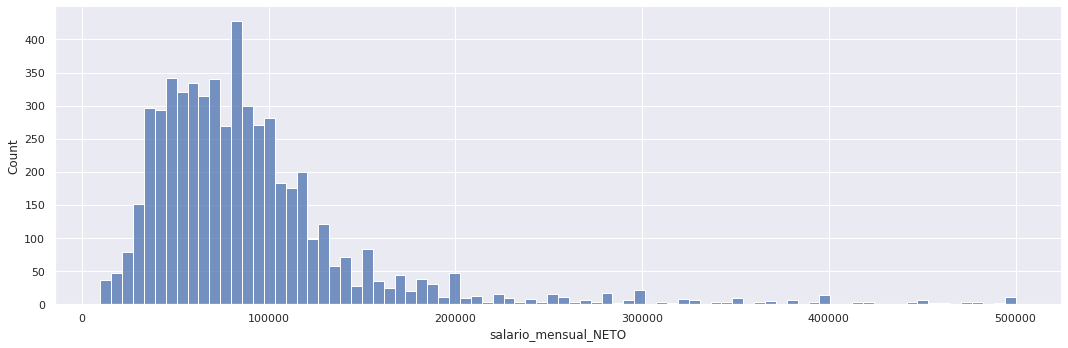

In [ ]:
sns.displot(df[(df["salario_mensual_NETO"]<=500000) & (df["salario_mensual_NETO"]>=10000) ]["salario_mensual_NETO"], aspect=3) #combino dos condiciones
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas   & es and y | es or

## Mapa de calor (Heatmap)

Podemos crear un gráfico que nos compare las frecuencias de dos variables categóricas, por ejemplo, “perfil_genero” y "perfil_nivel_estudios", donde el color de cada "cuadrante" será más oscuro donde hay mayor frecuencia de casos.

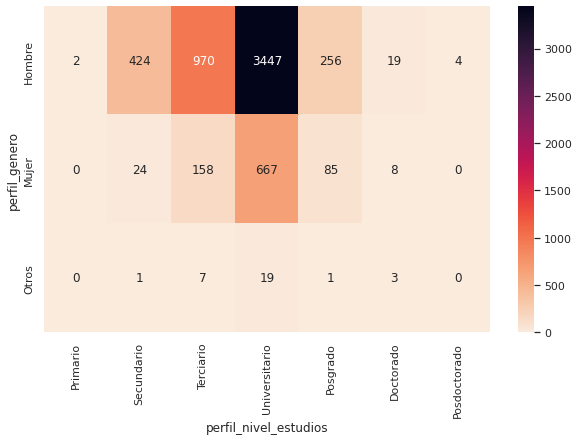

In [ ]:
orden = ['Primario', 'Secundario', 'Terciario', 
         'Universitario', 'Posgrado',  'Doctorado', 'Posdoctorado']
exp = pd.crosstab(df["perfil_genero"],
                  df["perfil_nivel_estudios"])[orden]
sns.heatmap(exp, annot=True, fmt="d", cmap="rocket_r");  #exp qué quiero graficar, annot si quiero que me ponga los valores o no, fmt para que los muestre 
#como numeros decimales, cmap= paletas de colores

In [ ]:
# Se ha graficado la siguiente información conocida como "Tabla cruzada". Esta tabla es la que voy a graficar arriba
pd.crosstab(df["perfil_genero"],
                  df["perfil_nivel_estudios"])[orden]

perfil_nivel_estudios,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
perfil_genero,,,,,,,
Hombre,2,424,970,3447,256,19,4
Mujer,0,24,158,667,85,8,0
Otros,0,1,7,19,1,3,0


## Ejercicio 1 - Histograma


a) Realizar un histograma que muestre la cantidad de personas de acuerdo a la variable `perfil_edad`.

**¡Tip!** Antes de graficar, controlar el rango (ya que seaborn intentará crear miles de segmentos si el rango es muy grande). Usar las funciones `.min()` y `.max()`. De ser necesario filtrar el conjunto de datos para graficar sólo valores menores a cierta edad.

b) ¿La variable edad tiene valores extremos?

In [ ]:
print('Rango edad: ', df['perfil_edad'].min(), df['perfil_edad'].max())

Rango edad:  18 52000


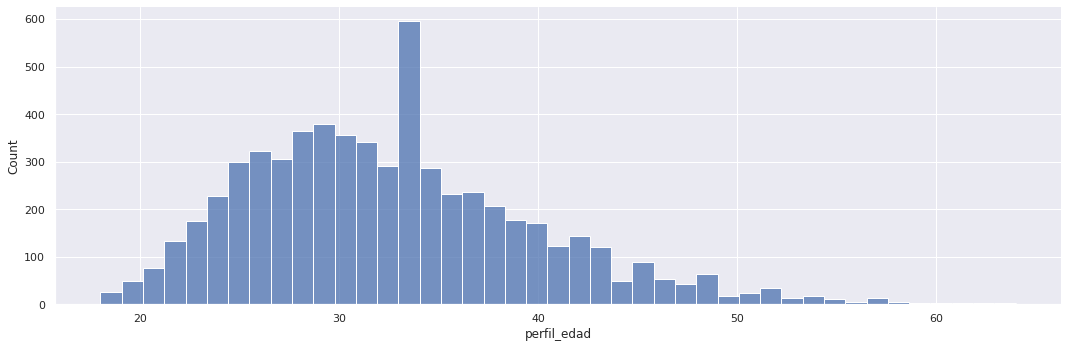

In [ ]:

sns.displot(df[df["perfil_edad"]<65]["perfil_edad"], aspect=3) #aspect es para setear el tamaño del grafico
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
df[df["perfil_edad"]>99]["perfil_edad"]

1659      567
5752    52000
Name: perfil_edad, dtype: int64

# Conclusiones preliminares del análisis de salarios

Las visualizaciones simples son prácticas para conocer la forma de los datos rápidamente, porque condensan mucha información.
En base a las primeras visualizaciones de los datos se pueden realizar varias preguntas o hipótesis:

1. ¿Cuál es la edad de la mayoría de los encuestados?
La mayoría de los encuestados tiene entre 25 y 35 años.

2. ¿Cuánto cobran de salario Neto la mayoría de los programadores en Argentina?
- El rango de valores de salario neto va desde 0 hasta aproximadamente 2M.
- La mayoría de los valores se concentra por debajo de los 250K, y pocos superan los 500K.
- Los valores más frencuentes aparentan estar cerca de los 100K.
- Hay un pico de ocurrencias cercano al valor 0, que brinda poco detalle.
- Se verifica un salario promedio mayor entre quienes han realizado un Posdoctorado, pero al ser sólo 4 registros, ésta subpoblación no es representativa en el total de la muestra (6095 personas respondieron la encuesta).
- Los salarios más altos son en su mayoría aquellos que están dolarizados (ver apartado "Bonus Track").

3. ¿Existe una diferencia de salarios entre los hombres y otros géneros?
- Existe una mayor cantidad de respuestas de la subpoblación "Hombres Universitarios".


Este es un punto de partida para el análisis del conjunto de datos. El análisis exploratorio de datos es un proceso que generalmente requiere varias iteraciones de análisis: a medida que se obtengan conclusiones, se descrubrirán otros aspectos relevantes de los datos, lo cual disparará nuevas preguntas.

# **Gráfico de caja o boxplot**
En estadística descriptiva, un gráfico de caja es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles. Los gráficos de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) indicando la variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos pueden representarse como puntos individuales.

La definición anterior sugiere que, si hay un valor atípico, se representará como un punto en el diagrama de caja, mientras que el resto de los datos de la muestra se agrupará y se mostrará en forma de cajas. Intentemos verlo nosotros mismos.
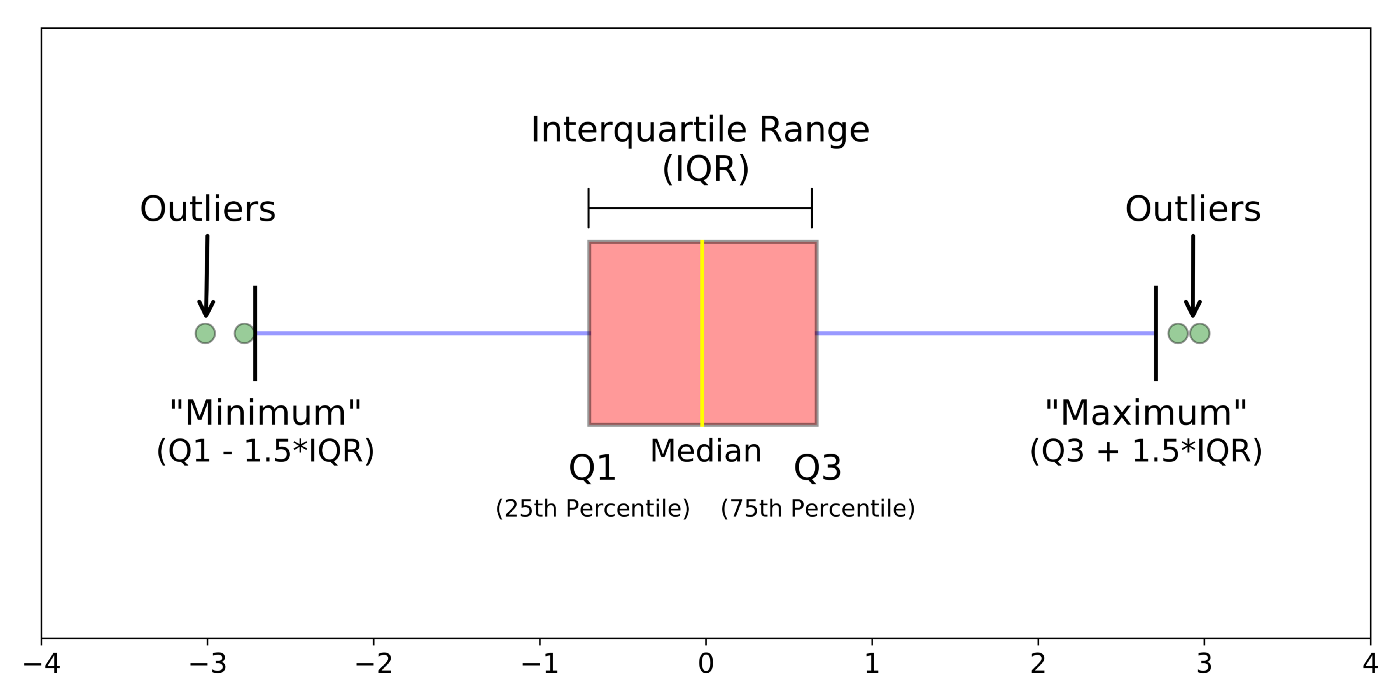

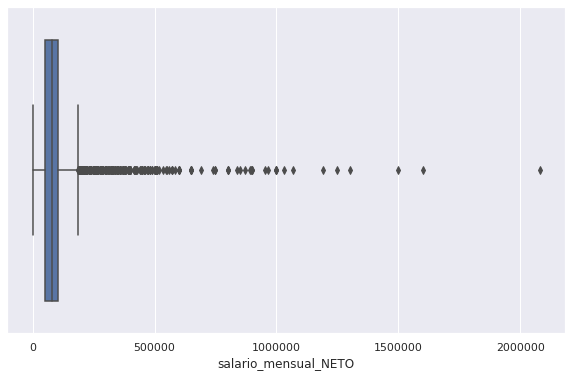

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x=df["salario_mensual_NETO"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas
#la cajita azul, la linea del medio es la mediana
#el salario presenta valores atipicos.
#tenemos que definir cual es el valor extremo que no queremos en nuestros datos y tmb considerar la cantidad de datos que perdemos al hacer ese filtro

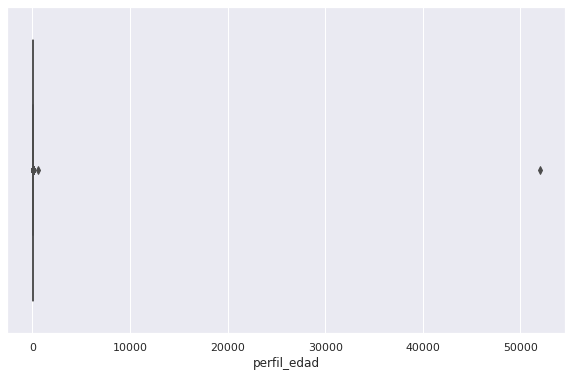

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x=df["perfil_edad"]);

Además de permitirnos visualizar valores atípicos, otro ejemplo de uso de los boxplots es el poder comparar la distribución de una variable numérica con respecto a otra categórica.

Comparemos los salarios netos con respecto al nivel de estudios alcanzado.

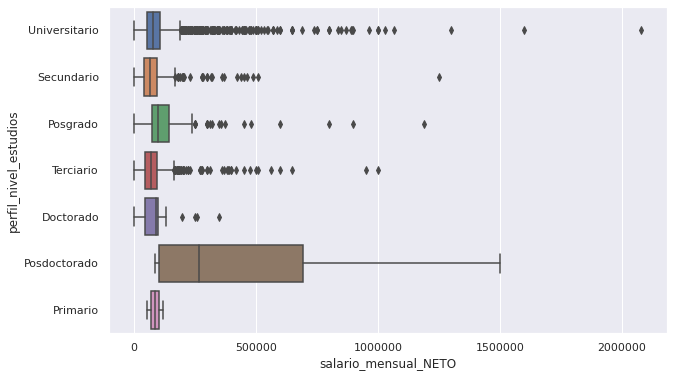

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data=df, x="salario_mensual_NETO", y='perfil_nivel_estudios')
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

**Si un valor atípico debe ser eliminado o no, debe ser analizado por el analista o científico de datos de acuerdo al problema en el que está trabajando.**

Por ejemplo, en nuestro dataset de respuestas a encuesta de salarios IT podemos tomar algunas decisiones de curación como:
- Respuestas con edades menores de 18 y mayores a 99 pueden ser eliminados.
- Eliminar salarios mayores a un millón de pesos (pero conservamos salarios altos como 500mil por ejemplo).


En otro dataset, de datos de propiedades en venta, que se usará para predecir el precio de venta:
- Cantidad de baños cero: Parece un valor atípico, que se ingresó de forma errónea, ya que toda propiedad debe tener al menos un baño, en éste caso se puede reemplazar por uno, ya que todas las casas deberían tener al menos un baño. Observar que pueden existir valores atípicos en los extremos inferiores también.
- Eliminar columna de dirección, ya que por sí sola no aporta nada y tendría gran variavilidad de valores posibles, es mejor contar con el Código Postal o Latitud/Longitud.
- Cantidad de habitaciones, eliminar casos por encima de 20.


###**Diferentes métodos de eliminación de outliers**

####**Filtrado en un valor específico**

Me quedo por ejemplo con edades mayores a 18 y menores a 99.


####**Rango intercuartílico**

Punto de datos que queda fuera de 1,5 veces de un rango intercuartil.
Ver diagrama de caja.


####**Desviación estándar**

Punto de datos que cae fuera de 2,5 desviaciones estándar con respecto a la media, la desviación estándar nos dice "cuánto nos alejamos de la media".

<center>
<img src="https://help.highbond.com/helpdocs/analytics/141/user-guide/es/Content/images/an/outliers_2.png" height="300" />
</center>

No todos los métodos son útiles en todos los casos, depende la variable que estoy analizando y se pueden probar varios métodos para ver cuál se ajusta mejor a nuestro dominio de problema.


### Funciones Auxiliares
¡Se debe correr al principio! Antes de la sección de Outliers.

No es necesaria su comprensión linea a linea, porque puede haber muchas formas de escribirlas e incluso librerías que nos brinden otra función, pero sí comprender el impacto en nuestros datos.

In [ ]:
# Eliminación de valores atípicos por medio del Rango Intercuartílico
def clean_outliers_q3(dataset, column_name, iqr_factor = 1.5):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (iqr_factor * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

# Eliminación de valores atípicos por medio de la Desviación estándard
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

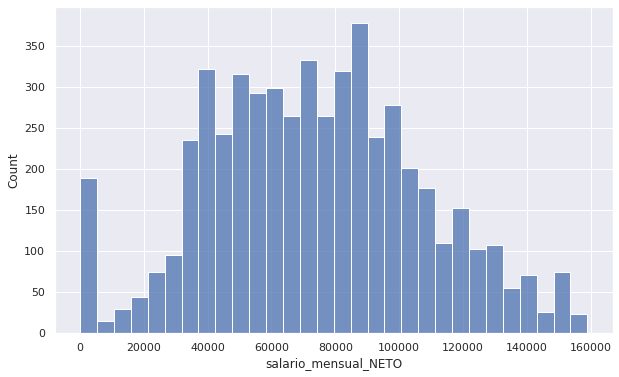

In [ ]:
data = clean_outliers_q3(df, 'salario_mensual_NETO', 1.5)['salario_mensual_NETO'] #elimino los valores que queden por fuera del tercer cuartil
sns.histplot(x=data); 

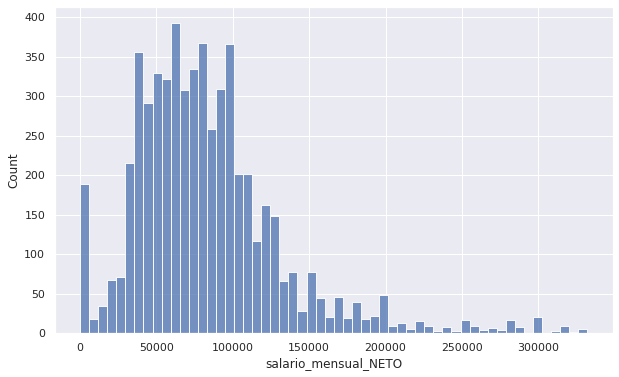

In [ ]:
data2 = clean_outliers_sd(df, 'salario_mensual_NETO')['salario_mensual_NETO']  #uso la desviacion standar para filtrar y eliminar lo que me alejo de la media
sns.histplot(x=data2)

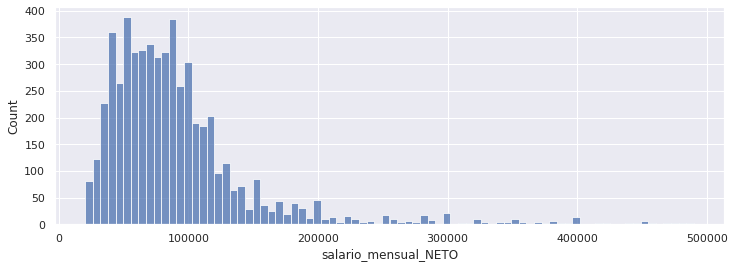

In [ ]:
# Filtrado por un valor constante
df_filtrado = df[(df["salario_mensual_NETO"]<500000) & (df["salario_mensual_NETO"]>20000)] # Podría pensarse en un límite inferior como el salario mínimo
fig = plt.figure(figsize=(12, 4))
sns.histplot(x=df_filtrado['salario_mensual_NETO'])

In [ ]:
#para ver cuantos datos perdí (los que saqué al limpiar)
df[(df["salario_mensual_NETO"]>500000) | (df["salario_mensual_NETO"]<20000)] 

,Unnamed: 0,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
103,103,Hombre,32,Argentina,GBA,15.0,9.0,9.0,0,Universitario,En curso,Licenciatura en Informática,Universidad Nacional del Oeste,"Sí, los pagó un empleador",No,Sí,DBA,Windows Server,".NET, C#, CSS, HTML, Javascript, SQL, VBA",".NET Core, Bootstrap, jQuery, Laravel, Symfony...","MariaDB, Microsoft Azure (Tables, CosmosDB, SQ...",JUnit,"Android Studio, Eclipse, Notepad++, Vi, Vim, V...",Windows,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,33000.0,27.000,NaN,1,1,Menos de un sueldo,Bonos para todo el sector publico nacional,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,10001+,Otras industrias,10,8,"Capacitaciones y/o cursos, Clases de idiomas, ...",NaN
105,105,Mujer,33,Argentina,GBA,9.0,0.0,7.0,0,Universitario,Incompleto,Licenciatura en Análisis de Sistemas,UBA - Universidad de Buenos Aires,No,No,No,Business Analyst,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Notepad++,Windows,Android,No,0.0,Bruto,Tercerizado (trabajo a través de consultora o ...,80000.0,67.000,NaN,1,1,No,No recibo bono,No,0.0,0,En un trabajo anterior,Heterosexual,NaN,NaN,201-500,Servicios / Consultoría de Software / Digital,5,7,Clases de idiomas,NaN
106,106,Hombre,30,Argentina,Chaco,7.0,3.0,3.0,0,Universitario,Completado,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular",Sí,Sí,Developer,"Docker, Linux","Bash/Shell, CSS, HTML, Javascript, PHP, Python...","Bootstrap, Django, Drupal, Flask, Laravel, Nod...","MySQL, PostgreSQL, SQLite","Jest, PHPUnit, Postman, Selenium","IntelliJ, IPython / Jupyter, PHPStorm, PyCharm...",macOS,Android,No,0.0,Neto,Full-Time,17000.0,14000.000,NaN,1,2,No,No recibo bono,No,0.0,0,En mi trabajo actual,¿Qué les importa?,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,5,4,Horarios flexibles,NaN
109,109,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,10.0,10.0,5.0,4,Terciario,En curso,Analista de Sistemas,ORT,"Sí, de forma particular",No,Sí,Jefe de infraestructura,"Azure, Linux, VMWare, Windows Server","C#, SQL",Ninguno,Microsoft SQL Server,Ninguna,Visual Studio,Windows,iOS,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,95.000,NaN,2,2,De uno a tres sueldos,Performance de la compañía,Uno,18.0,5,Jamás,¿Qué les importa?,NaN,No,201-500,Servicios / Consultoría de Software / Digital,5,6,Abono de celular,Google despegar mercadolibre
151,151,Mujer,34,Argentina,Ciudad Autónoma de Buenos Aires,8.0,8.0,8.0,0,Terciario,Incompleto,Docente,ISFD N50,"Sí, de forma particular, Sí, los pagó un emple...",No,No,Consultant,Ninguna,SQL,Ninguna,"Microsoft SQL Server, MySQL, Oracle",Ninguna,Ninguno,Windows,Android,No,0.0,Bruto,Full-Time,55.0,51.000,NaN,1,1,No,No recibo bono,No,10.0,4,En mi trabajo actual,Heterosexual,NaN,NaN,201-500,Servicios / Consultoría de Software / Digital,

# **Manejo de valores faltantes**
Los valores faltantes son un problema bastante común al cual nos enfrentamos a la hora de hacer ciencia de datos.

Son un problema principalmente para el modelado de machine learning (que veremos más adelante), pero también pueden serlo a la hora de graficar o buscar valores estadísticos.

Normalmente se ven nombrados como: valores faltantes, nulos, missing values, NaN, NA o null.

Primero visualizamos la cantidad de respuestas con datos faltantes por cada variable, haciendo uso de la función .isnull():

In [ ]:
df.isnull().sum() #la cantidad de datos que no se completaron en cada variable. Si dice 0 es que estan todos los valores completos

Unnamed: 0                                          0
perfil_genero                                       0
perfil_edad                                         0
trabajo_pais                                        0
trabajo_provincia                                   0
perfil_anos_experiencia                             0
trabajo_anios_empresa_actual                        0
trabajo_anios_puesto_actual                         0
trabajo_personas_a_cargo                            0
perfil_nivel_estudios                               0
perfil_estado_estudios                              0
perfil_carrera                                    299
perfil_universidad                                534
perfil_cursos_especializacion                       0
perfil_contribuciones_open_source                   0
perfil_programa_como_hobbie                         0
trabajo_rol                                         0
herramientas_plataforma                             2
herramientas_languagjs_progr

In [ ]:
# Total de valores nulos
df.isnull().sum().sum()

20588

In [ ]:
df.shape # de 6095*49=298655 valores en total, un 6,89% son nulos

(6095, 49)

Y después podemos hacer lo mismo pero con el porcentaje del total de respuestas:

In [ ]:
df.isnull().sum()/len(df)*100

Unnamed: 0                                        0.000000
perfil_genero                                     0.000000
perfil_edad                                       0.000000
trabajo_pais                                      0.000000
trabajo_provincia                                 0.000000
perfil_anos_experiencia                           0.000000
trabajo_anios_empresa_actual                      0.000000
trabajo_anios_puesto_actual                       0.000000
trabajo_personas_a_cargo                          0.000000
perfil_nivel_estudios                             0.000000
perfil_estado_estudios                            0.000000
perfil_carrera                                    4.905660
perfil_universidad                                8.761280
perfil_cursos_especializacion                     0.000000
perfil_contribuciones_open_source                 0.000000
perfil_programa_como_hobbie                       0.000000
trabajo_rol                                       0.0000

# **¿Qué se puede hacer con estos valores faltantes?**
Bueno, hay varias opciones... Como todo, dependerá de la situación.

Eliminar los datos con valores faltantes
La primera y más simple sería realizar lo que se conoce como drop, que consta simplemente de deshacerse de todas las filas (o más raramente columnas) que contengan valores faltantes.

In [ ]:
df_6=df.copy() #Hago una copia del df para no modificar el original

In [ ]:
df_6.isnull().sum() #verifico que la suma de los nulos sea igual que el df

Unnamed: 0                                          0
perfil_genero                                       0
perfil_edad                                         0
trabajo_pais                                        0
trabajo_provincia                                   0
perfil_anos_experiencia                             0
trabajo_anios_empresa_actual                        0
trabajo_anios_puesto_actual                         0
trabajo_personas_a_cargo                            0
perfil_nivel_estudios                               0
perfil_estado_estudios                              0
perfil_carrera                                    299
perfil_universidad                                534
perfil_cursos_especializacion                       0
perfil_contribuciones_open_source                   0
perfil_programa_como_hobbie                         0
trabajo_rol                                         0
herramientas_plataforma                             2
herramientas_languagjs_progr

In [ ]:
df_6.dropna(inplace=True) #borro todas las filas que tengan algún valor nulo
#con "inplace = True" definimos que se reemplace el df_6

In [ ]:
df_6.shape  #quedaron muy poquitas filas, ojo! con borrar tantos datos. Tmb se pueden eliminar por columnas.

(15, 49)

In [ ]:
df_6.isnull().sum()

Unnamed: 0                                       0
perfil_genero                                    0
perfil_edad                                      0
trabajo_pais                                     0
trabajo_provincia                                0
perfil_anos_experiencia                          0
trabajo_anios_empresa_actual                     0
trabajo_anios_puesto_actual                      0
trabajo_personas_a_cargo                         0
perfil_nivel_estudios                            0
perfil_estado_estudios                           0
perfil_carrera                                   0
perfil_universidad                               0
perfil_cursos_especializacion                    0
perfil_contribuciones_open_source                0
perfil_programa_como_hobbie                      0
trabajo_rol                                      0
herramientas_plataforma                          0
herramientas_languagjs_programacion              0
herramientas_frameworks        

Genial! No tenemos más valores faltantes.

Sin embargo, como ya se remarcó, esta no siempre es la mejor opción.

Entonces, ¿qué otra cosa podríamos hacer?

# **Imputar por la media o mediana**

Otra opción es imputar ese valor por algún valor estadístico, como la media o la mediana... (completo los valores nulos con el promedio) Las ventajas son que es fácil, rápido y refleja mejor la distribución de la variable. Pero también tiene desventajas: no tiene en cuenta las correlaciones entre características, es decir, solo funciona a nivel de columna. Tampoco es muy preciso, es sensible a valores extremos* y su uso no es útil en variables categóricas.

*es conveniente primero hacer la limpieza de valores extremos y posteriormente realizar esta imputación

In [ ]:
df_7= df.copy() #hago una nueva copia del dataset

In [ ]:
df_7.fillna(df_7.mean(), inplace=True) #completo los nulos con el promedio y reemplazo en el df_7

In [ ]:
df_7.isnull().sum()  #los valores nulos que quedan son de variables categóricas, para estos casos tiene sentido imputar la moda (valor mas frecuente)

Unnamed: 0                                          0
perfil_genero                                       0
perfil_edad                                         0
trabajo_pais                                        0
trabajo_provincia                                   0
perfil_anos_experiencia                             0
trabajo_anios_empresa_actual                        0
trabajo_anios_puesto_actual                         0
trabajo_personas_a_cargo                            0
perfil_nivel_estudios                               0
perfil_estado_estudios                              0
perfil_carrera                                    299
perfil_universidad                                534
perfil_cursos_especializacion                       0
perfil_contribuciones_open_source                   0
perfil_programa_como_hobbie                         0
trabajo_rol                                         0
herramientas_plataforma                             2
herramientas_languagjs_progr

### **Imputar por la moda**

In [ ]:
df_7.fillna(df.mode().iloc[0], inplace = True) # .iloc[0] hace que la moda se calcule independientemente para cada columna.

In [ ]:
df_7.isnull().sum()

Unnamed: 0                                       0
perfil_genero                                    0
perfil_edad                                      0
trabajo_pais                                     0
trabajo_provincia                                0
perfil_anos_experiencia                          0
trabajo_anios_empresa_actual                     0
trabajo_anios_puesto_actual                      0
trabajo_personas_a_cargo                         0
perfil_nivel_estudios                            0
perfil_estado_estudios                           0
perfil_carrera                                   0
perfil_universidad                               0
perfil_cursos_especializacion                    0
perfil_contribuciones_open_source                0
perfil_programa_como_hobbie                      0
trabajo_rol                                      0
herramientas_plataforma                          0
herramientas_languagjs_programacion              0
herramientas_frameworks        

# **Otras opciones:**

* Imputar por un valor fijo. Se debe ser cuidadoso porque los valores imputados 
modificarán la distrribución y estadísticas de nuestros datos. Por ejemplo reemplazar en un dataset de propiedades en venta, el valor faltante de baños por 1, ya que todas las propiedades debieran tener al menos 1 baño.

* Imputar por un valor al azar que esté en esa misma columna (no muy utilizado). Es decir, para los valores faltantes en la edad, tomará algún valor al azar presente en la variable edad y lo colocará en lugar de ese valor faltante.
* Imputar utilizando métodos de predicción: éstos métodos nos permiten utilizar para predecir los datos faltantes de una columna, no sólo los datos que si tenemos de esa variable, si no, utilizar datos de otras variables numéricas. Algunos de éstos métodos son "K vecinos más próximos (KNN)", "Árboles de Decisión". Aunque no vamos a verlos en éste encuentro, sepan que se puede ¡y vale la pena investigarlo una vez que terminen este bootcamp!

# **Ejercicio 2 - Curación de datos**
Analizar la variable 'salario_mensual_NETO' para detectar valores extremos Hints:

* Analizar sus valores, con las funciones .describe().round(3) o su rango con .min() y .max()

* Realizar un diagrama de caja (función sns.boxplot) que visualize los cuartiles de la variable y los posibles valores atípicos.

* Decidir el rango de valores que queremos conservar (o eliminar) y crear un nuevo dataframe que tenga todos los mismos datos que el dataframe original (df), pero con los valores de salarios netos que no queremos, ya filtrados o eliminados.

In [ ]:
df['salario_mensual_NETO'].describe().round(2)

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salario_mensual_NETO, dtype: float64

In [ ]:
print ("Rango de salarios: ", df['salario_mensual_NETO'].min(), df['salario_mensual_NETO'].max())

Rango de salarios:  1.0 2080000.0


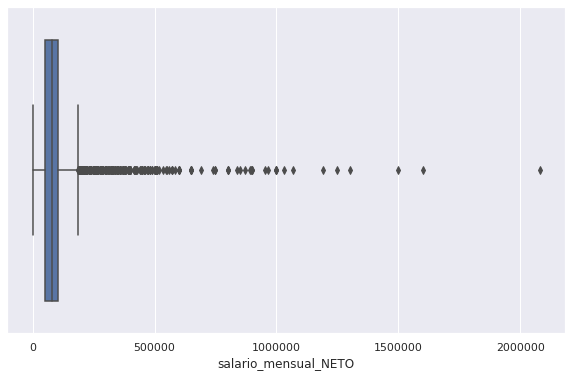

In [ ]:
# Responder acá, Boxplot
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x=df["salario_mensual_NETO"])
plt.ticklabel_format(style='plain', axis='x')



In [ ]:
#filtro los salarios
df_filtrado = df[(df["salario_mensual_NETO"]>20000) & (df["salario_mensual_NETO"]<300000)] 

In [ ]:
df_filtrado.shape

(5432, 49)

In [ ]:
df[(df["salario_mensual_NETO"]>20000) & (df["perfil_nivel_estudios"]=="Universitario") & (df["salario_mensual_NETO"]<300000)] 

,Unnamed: 0,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
4,4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
6,6,Hombre,33,Argentina,Ciudad Autónoma de Buenos Aires,1.0,1.0,1.0,0,Universitario,Incompleto,Ingeniería en Informática,UBA - Universidad de Buenos Aires,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,Developer,"Amazon Web Services, Docker, Linux, Serverless",Javascript,Node.js,"MongoDB, MySQL, Redis",Postman,Visual Studio Code,GNU/Linux,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,75000.0,62400.0,NaN,3,3,No,No recibo bono,Dos,8.0,4,Jamás,Heterosexual,NaN,NaN,51-100,Producto basado en Software,7,7,"Capacitaciones y/o cursos, Clases de gimnasia ...",Mercado Libre
8,8,Hombre,40,Argentina,Entre Ríos,20.0,10.0,2.0,0,Universitario,Incompleto,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular",No,Sí,Developer,"Linux, Windows Server","Javascript, PHP, TypeScript","Node.js, NestJS, Phalcon FW, Zend FW.","PostgreSQL, Redis",Ninguna,"Android Studio, Notepad++, Visual Studio Code,...",Windows,iOS,"Sí, pasiva",1200.0,Bruto,Full-Time,105000.0,75000.0,NaN,2,2,No,No r

In [ ]:
df[(df["salario_mensual_NETO"]>20000) & (df["perfil_nivel_estudios"]=="Universitario")  & (df["perfil_genero"]=="Mujer")& (df["salario_mensual_NETO"]<300000)] 

,Unnamed: 0,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
17,17,Mujer,31,Argentina,Ciudad Autónoma de Buenos Aires,3.0,2.0,2.0,0,Universitario,Completado,Ingeniería en Informática,UBA - Universidad de Buenos Aires,"Sí, los pagó un empleador",No,Sí,Developer,"Kubernetes, Linux","HTML, Java, Javascript",Bootstrap,Microsoft SQL Server,"Cucumber, JUnit, Postman, Selenium","IntelliJ, Visual Studio Code",GNU/Linux,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,88000.0,70000.0,NaN,3,3,Un sueldo,Performance de la compañía,Dos,30.0,2,En un trabajo anterior,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,8,7,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
25,25,Mujer,30,Argentina,Ciudad Autónoma de Buenos Aires,12.0,0.0,4.0,14,Universitario,Completado,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular",No,No,Project Manager,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,98700.0,Mi sueldo está dolarizado,3,2,Menos de un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,8,4,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
27,27,Mujer,30,Argentina,Ciudad Autónoma de Buenos Aires,1.0,1.0,1.0,0,Universitario,En curso,Ingeniería en Informática,UNDAV (Universidad Nacional de Avellaneda),"Sí, de forma particular, Sí, los pagó un emple...",No,No,Developer,Ninguna,"CSS, HTML, Javascript","Node.js, React.js",Ninguna,Ninguna,Visual Studio Code,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,36000.0,31000.0,NaN,2,2,Menos de un sueldo,Performance grupal,Uno,20.0,3,Jamás,Bisexual o queer,NaN,NaN,501-1000,Producto basado en Software,4,6,"Capacitaciones y/o cursos, Clases de gimnasia ...","Southworks, Etermax, Globlalogic"
28,28,Mujer,28,Argentina,Ciudad Autónoma de Buenos Aires,9.0,3.0,5.0,0,Universitario,Completado,Licenciatura en Sistemas de Información,UP - Universidad de Palermo,"Sí, de forma particular",No,No,Business Analyst,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,94000.0,74000.0,NaN,3,2,Un sueldo,Performance individual,No,0.0,1,En un trabajo anterior,Homosexual,NaN,No,1001-20